#Trabalho 2 de IA - T02-2023-1
>Nome: Giovanna Rodrigues Mendes


>RGA: 2021.1904.032-7

>Professor: Jonathan de Andrade Silva



In [ ]:
#Montar um drive, já que não há uma página com os dados, apenas .data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


O colab é referente ao MLP para a base de dados Mushroom na UCI Repository

In [ ]:
#Importando a bib numpy para manipular arrays e a panda, para armazenar os dados
import numpy as np
import pandas as pd

#Importando também a bib matplotlib para visualizar os dados em gráficos
%matplotlib inline
from matplotlib import pyplot as plt

#Definindo os nomes dos atributos de cada animal
atributos = ['class', 'cap-shape',  'cap-surface',  'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
             'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
             'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
             'ring-type', 'spore-print-color', 'population', 'habitat']

#Obtendo os dados dos cogumelos no repositorio da UCI:
df = pd.read_csv('/content/drive/MyDrive/ArquivosPC/Estudo_UFMS/InteligenciaArtificial/Trabalho2/agaricus-lepiota.data',names=atributos)

#Visualizando o cabeçalho do dataset
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
#Importando a bib sklearn.preprocessing para transformar os atributos categóricos em numéricos
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [ ]:
#Inicializando a variável PATH e, juntamente, carregando o melhor modelo encontrado para a MLP criada
PATH = '/content/drive/MyDrive/ArquivosPC/Estudo_UFMS/InteligenciaArtificial/Trabalho2/'

In [ ]:
import torch
# model = torch.load(PATH)
# model.eval()

##Dividindo o dataset em treino e teste

In [ ]:
#Importando a bib sklearn.model_selection para dividir a base de dados em treino e em teste
from sklearn.model_selection import train_test_split
data = df.to_numpy()

#Dividindo os atributos e as classes, respectivamente, da base de dados
X = data[:,1:]
y = data[:,0]
print('X:',X)
print('y:',y)

#Listando os valores categóricos dos atributos
listaDeAtributos = [['b', 'c', 'x', 'f', 'k', 's'],
                    ['f', 'g', 'y', 's'],
                    ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
                    ['t', 'f'],
                    ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                    ['a', 'd', 'f', 'n'],
                    ['c', 'w', 'd'],
                    ['b', 'n'],
                    ['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],
                    ['e', 't'],
                    ['b', 'c', 'u', 'e', 'z', 'r', '?'],
                    ['f', 'y', 'k', 's'],
                    ['f', 'y', 'k', 's'],
                    ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                    ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                    ['p', 'u'],
                    ['n', 'o', 'w', 'y'],
                    ['n', 'o', 't'],
                    ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                    ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                    ['a', 'c', 'n', 's', 'v', 'y'],
                    ['g', 'l', 'm', 'p', 'u', 'w', 'd']]

#O laço abaixo serve para transformar os dados categóricos em numéricos
for i in range(0,22):
  lb.fit(listaDeAtributos[i])
  X[:,i] = lb.transform(X[:,i])

#Fazendo o test_size=0.2 significa que 20% dos dados vão para o teste e 80%, para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Vamos pegar uma porção do treino para validar nosso modelo durante o treino (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)
print('Treino:',X_train.shape)
print('Treino Rotulos:',np.unique(y_train))
print('Validação:',X_val.shape)
print('Validação Rotulos:',np.unique(y_val))
print('Teste:',X_test.shape)
print('Teste Rotulos:',np.unique(y_test))

X: [['x' 's' 'n' ... 'k' 's' 'u']
 ['x' 's' 'y' ... 'n' 'n' 'g']
 ['b' 's' 'w' ... 'n' 'n' 'm']
 ...
 ['f' 's' 'n' ... 'b' 'c' 'l']
 ['k' 'y' 'n' ... 'w' 'v' 'l']
 ['x' 's' 'n' ... 'o' 'c' 'l']]
y: ['p' 'e' 'e' ... 'e' 'p' 'e']
Treino: (5199, 22)
Treino Rotulos: ['e' 'p']
Validação: (1300, 22)
Validação Rotulos: ['e' 'p']
Teste: (1625, 22)
Teste Rotulos: ['e' 'p']


>Imagem dos atributos e seus valores (com o significado de cada sigla)

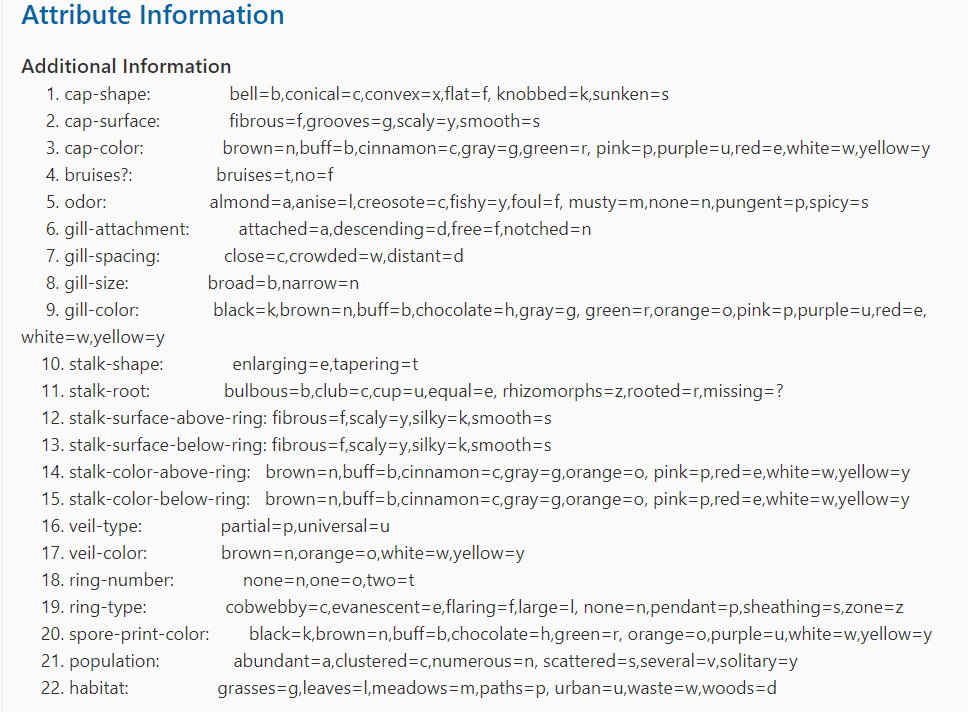

In [ ]:
#Mostrando na tela como o array ficou após a tranformação
X_train

array([[5, 2, 4, ..., 7, 4, 4],
       [5, 3, 4, ..., 3, 4, 0],
       [5, 0, 3, ..., 3, 4, 0],
       ...,
       [5, 3, 2, ..., 7, 4, 4],
       [5, 2, 9, ..., 6, 4, 0],
       [2, 3, 9, ..., 1, 5, 0]], dtype=object)

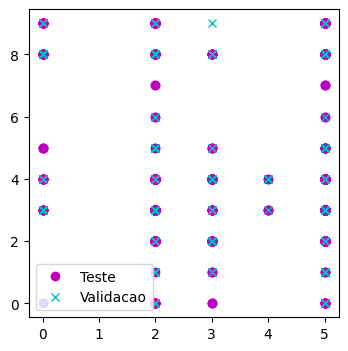

In [ ]:
#Visualizando todos dados as classes por cor em relação ao teste e à validação
definitelyEdible = y == 'e'
definitelyEdible = X[definitelyEdible,:].copy()

definitelyPoisonous = y == 'p'
definitelyPoisonous = X[definitelyPoisonous,:].copy()

plt.figure(figsize=(4,4))

plt.plot(X_test[:,0],X_test[:,2],'mo',label='Teste')
plt.plot(X_val[:,0],X_val[:,2],'xc',label='Validacao')

plt.legend()

plt.show()

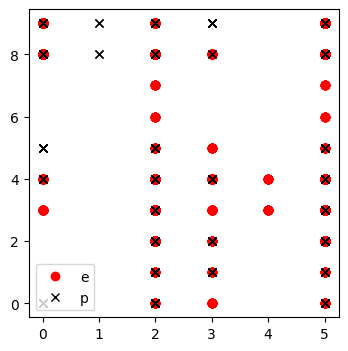

In [ ]:
#Agora, as classes unicamente
plt.figure(figsize=(4,4))

plt.plot(definitelyEdible[:,0],definitelyEdible[:,2],'or',label='e')
plt.plot(definitelyPoisonous[:,0],definitelyPoisonous[:,2],'xk',label='p')

plt.legend()

plt.show()

## Configurando a Rede Neural utilizando a biblioteca PYTORCH

In [ ]:
#Importando as bibliotecas
#import torch foi importado anteriormente
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

> Definindo a estrutura de rede neural (Deixei do mesmo jeito que o senhor fez para a íris, pois, com os critérios de avaliação, acredito que foi bom essa estrutura).



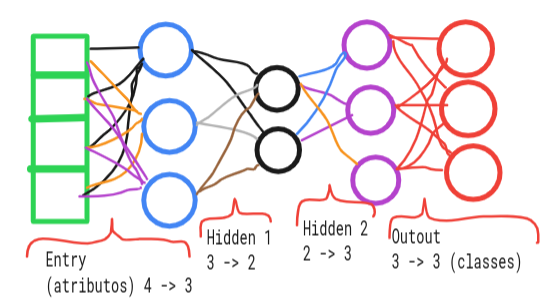

In [ ]:
#Definindo a arquitetura do modelo
#4 (entrada) -> [layer1: 3,layer2: 3](oculta) -> 3 (classes)
class MLP(nn.Module):

    #Definindo os componentes
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.layerEntry = nn.Linear(input_dim, 3)
        self.layerHidden1 = nn.Linear(3, 2)
        self.layerHidden2 = nn.Linear(2, 3)
        self.layerOut = nn.Linear(3, output_dim)

    #Definindo a sequência da execução dos componentes utilizando relu e softmax
    def forward(self, x):
        x = F.relu(self.layerEntry(x))
        x = F.relu(self.layerHidden1(x))
        x = F.relu(self.layerHidden2(x))
        x = F.softmax(self.layerOut(x), dim=1)
        return x

In [ ]:
#Criando o modelo definindo o número de objetos no conjunto de treino e de classes do conjunto de treinamento
num_atributes = X_train.shape[1]
num_classes = len(np.unique(y_train))

#Criando o modelo e salvando na variável model (que será utilizada como um dos parâmetros para salvamento do modelo)
model = MLP(num_atributes,num_classes)

#Utilizando o seguinte método para calcular o gradiente e atualizar pesos (otimizadores)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

#Fazendo Entropia Cruzada para achar o erro (loss)
loss_fn = nn.CrossEntropyLoss()

print(model)
print(model.layerHidden1.weight-0.3)

MLP(
  (layerEntry): Linear(in_features=22, out_features=3, bias=True)
  (layerHidden1): Linear(in_features=3, out_features=2, bias=True)
  (layerHidden2): Linear(in_features=2, out_features=3, bias=True)
  (layerOut): Linear(in_features=3, out_features=2, bias=True)
)
tensor([[-0.0736, -0.8376, -0.7767],
        [-0.6530, -0.4907, -0.0472]], grad_fn=<SubBackward0>)


In [ ]:
#Importando a bib sklearn para o pré-processamento dos dados
from sklearn import preprocessing

#Criando a estrutura de dados para o Pytorch (Variable -> Tensor)
X_train = X_train.astype(float)
X_trainT = Variable(torch.from_numpy(X_train)).float()
y_trainT = preprocessing.LabelEncoder().fit_transform(y_train)
y_trainT = Variable(torch.from_numpy(y_trainT)).long()

X_val = X_val.astype(float)
X_valT = Variable(torch.from_numpy(X_val)).float()
y_valT = preprocessing.LabelEncoder().fit_transform(y_val)
y_valT = Variable(torch.from_numpy(y_valT)).long()

X_test = X_test.astype(float)
X_testT = Variable(torch.from_numpy(X_test)).float()
y_testT = preprocessing.LabelEncoder().fit_transform(y_test)
y_testT = Variable(torch.from_numpy(y_testT)).long()

In [ ]:
#Treinando o modelo
import tqdm

EPOCHS = 1000
min_loss = 100000
best_epoch = -1

loss_train = np.zeros((EPOCHS,))
loss_val = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_trainT)
    loss = loss_fn(y_pred, y_trainT)
    loss_train[epoch] = loss.item()

    #Zerando os valores de Gradiente para não serem considerados da época anterior
    optimizer.zero_grad()

    #Calculando o Gradiente
    loss.backward()

    #Atualizando os parâmentros da rede
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_valT)
        loss = loss_fn(y_pred, y_valT)
        loss_val[epoch] = loss.item()
        if loss_val[epoch] < min_loss:
          best_epoch = epoch
          min_loss = loss_val[epoch]
        correct = (torch.argmax(y_pred, dim=1) == y_valT).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

print('\nMenor erro da Validação: ',min_loss,' EPOCA: ',best_epoch)

100%|██████████| 1000/1000 [00:04<00:00, 213.26it/s]


Menor erro da Validação:  0.36417120695114136  EPOCA:  999


##Observando se teve Overfitting

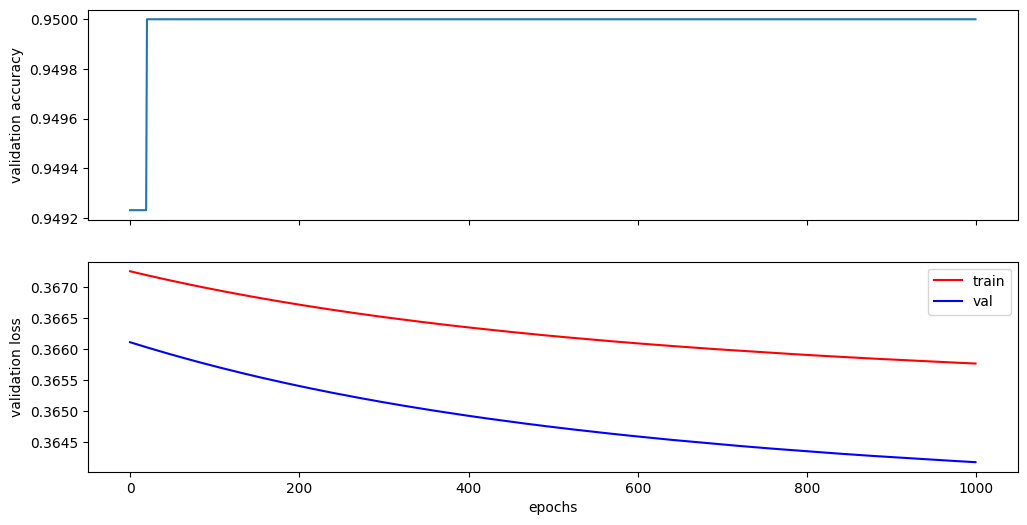

In [ ]:
#Ajustando os dados que queremos plotar para analisar se houve ou não overfitting
#Isso, baseado na acurácia de nos valores da loss_val e da loss_train em relação às épocas
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_train,'-r',label='train')
ax2.plot(loss_val,'-b',label='val')
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");
ax2.legend()

>O modelo pode ser salvo da forma como apresentado no colab que é este

In [ ]:
torch.save({
          'epoch': epoch,
          'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
           'loss': loss_val,}, PATH+'myMLP.tar')

##Testando o modelo

In [ ]:
with torch.no_grad():

    #Passando os dados para o modelo treinado
    y_pred = model(X_testT)
    print('resultados da predição:\n',y_pred[:5,:])
    print('melhores resultados (MAX) de cada predição: ',torch.argmax(y_pred, dim=1)[:5])
    print('Resultados da anotação do conjunto de teste: ',y_testT[:5])

    #Vericando quais repostas casam com a anotação
    rigth_wrong_ans = (torch.argmax(y_pred, dim=1) == y_testT)

    #Convertendo False = 0.0 e True = 1.0
    correct = (rigth_wrong_ans).type(torch.FloatTensor)

    #Calculando a média dos valores
    acc = correct.mean()
    print('Acertos :',acc)

resultados da predição:
 tensor([[9.9996e-01, 4.2278e-05],
        [6.0109e-05, 9.9994e-01],
        [9.8319e-01, 1.6812e-02],
        [5.2331e-03, 9.9477e-01],
        [2.7559e-06, 1.0000e+00]])
melhores resultados (MAX) de cada predição:  tensor([0, 1, 0, 1, 1])
Resultados da anotação do conjunto de teste:  tensor([0, 1, 0, 1, 1])
Acertos : tensor(0.9422)


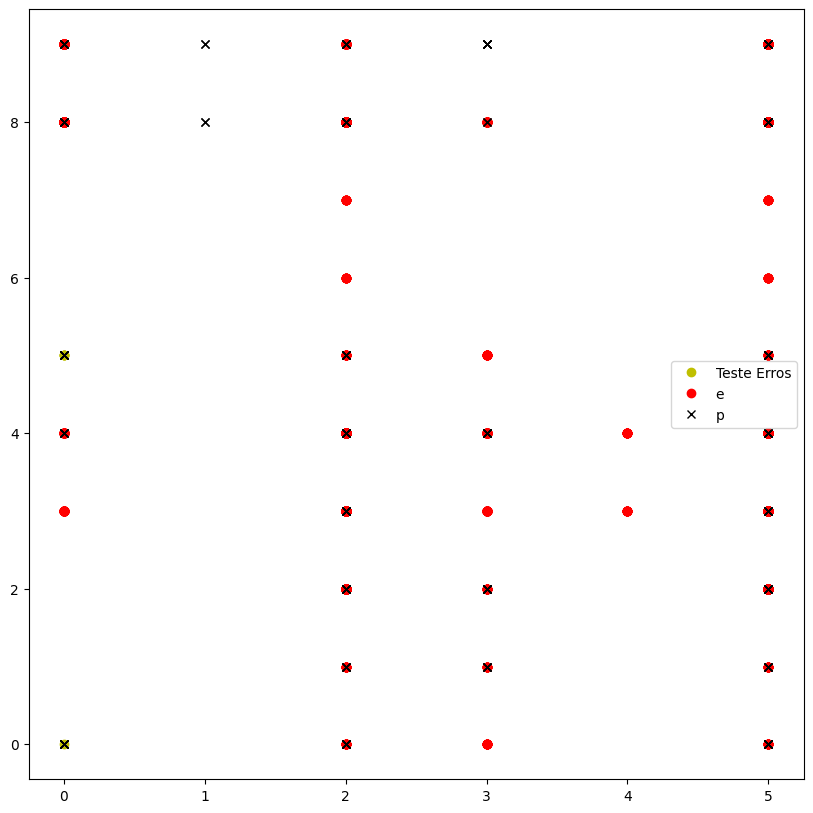

In [ ]:
#Visualizando os dados incorretos no gráfico de pontos
plt.figure(figsize=(10,10))

plt.plot(X_test[rigth_wrong_ans==False,0],X_test[rigth_wrong_ans==False,2],'yo',label='Teste Erros')

plt.plot(definitelyEdible[:,0],definitelyEdible[:,2],'or',label='e')
plt.plot(definitelyPoisonous[:,0],definitelyPoisonous[:,2],'xk',label='p')

plt.legend()

plt.show()

## Visualizando as saídas de dois neurônios

In [ ]:
#Fazendo isso com relu
res1 = F.relu(X_testT @ model.layerEntry.weight.t() + model.layerEntry.bias)
print(res1)
res2 = F.relu(res1 @ model.layerHidden1.weight.t() + model.layerHidden1.bias)
print(res2)
print(y_testT)

tensor([[7.8932, 0.0000, 4.2997],
        [2.7087, 0.0000, 3.2390],
        [6.8020, 0.0000, 4.6324],
        ...,
        [9.0507, 0.0000, 3.8290],
        [3.4718, 0.0000, 4.9174],
        [5.5084, 0.0000, 8.6017]], grad_fn=<ReluBackward0>)
tensor([[5.3093, 0.4177],
        [0.6958, 2.9818],
        [4.0155, 1.6994],
        ...,
        [6.7499, 0.0000],
        [0.4913, 4.6361],
        [0.4069, 7.9901]], grad_fn=<ReluBackward0>)
tensor([0, 1, 0,  ..., 1, 1, 0])


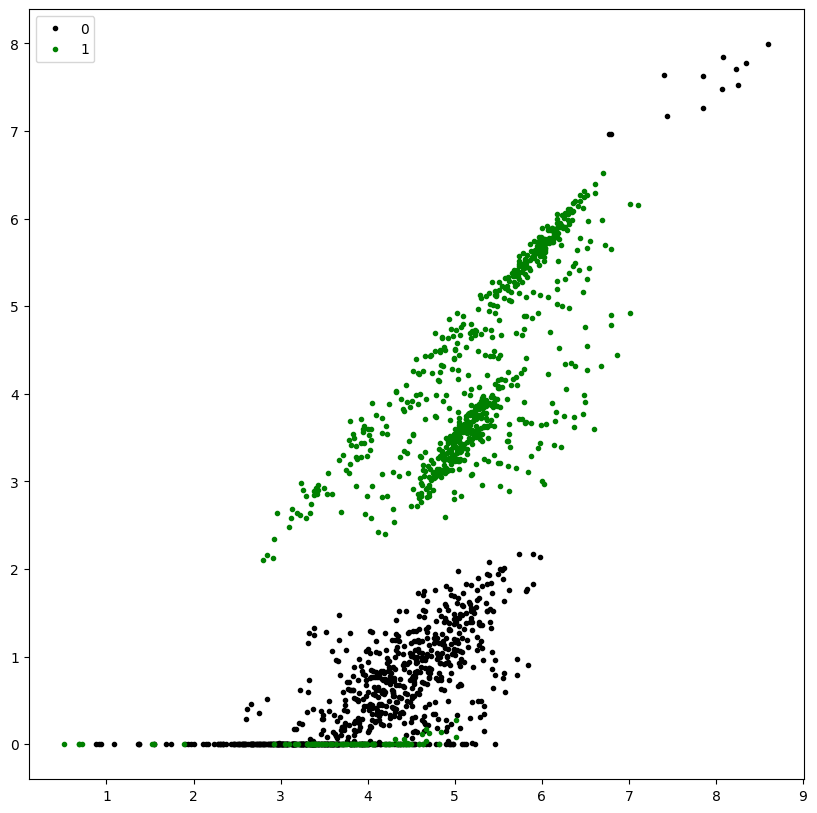

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(res1[y_testT==0,2].detach().numpy(),res2[y_testT==0,1].detach().numpy(),'.k',label='0')
plt.plot(res1[y_testT==1,2].detach().numpy(),res2[y_testT==1,1].detach().numpy(),'.g',label='1')
plt.legend()

plt.show()

##Aplicado, agora, as métricas de precisão, revogação e F1-score a partir da matriz de confusão

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


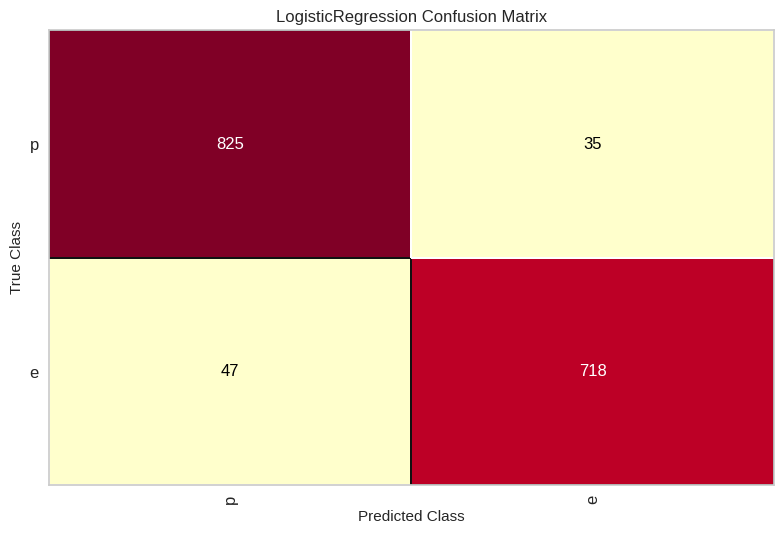

<Figure size 800x550 with 0 Axes>

In [ ]:
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['p', 'e']
)
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_testT

print(classification_report(y_true, torch.argmax(y_pred, dim=1), labels=['p','e']))

              precision    recall  f1-score   support

           p       0.00      0.00      0.00         0
           e       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will pe